# Newton Method

## Visualization

In [1]:
import numpy as np
from numpy import sin , cos, pi
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def f(*X):
    if len(X) == 2:
        x1, x2 = X[0], X[1]
        return 2*x1**2+2*x2**2 - 17*x2*cos(0.2*pi*x1)-x1*x2
    else:
        x1, x2 = X[0][0], X[0][1]
        return 2*x1**2+2*x2**2 - 17*x2*cos(0.2*pi*x1)-x1*x2


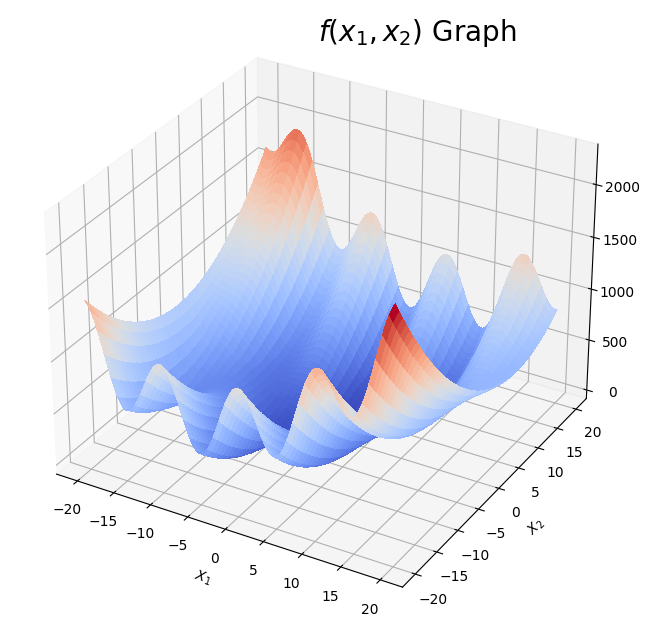

In [3]:

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize =(8,8))
a=20
# Make data.
X = np.arange(-a, a, 0.1)
Y = np.arange(-a, a, 0.1)
X, Y = np.meshgrid(X, Y)
Z = f(X,Y)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap='coolwarm',
                       linewidth=0, antialiased=False)
ax.set_xlabel('$X_1$')
ax.set_ylabel('$X_2$')
ax.text2D(0.5, 0.95, "$f(x_1,x_2)$ Graph", transform=ax.transAxes, fontsize = 20)


# Customize the z axis.

# Add a color bar which maps values to color
plt.show()


## Implementation

In [4]:
def grad_f(X):
    x1,x2 = X[0],X[1]
    first_element = 4*x1+3.4*pi*x2*sin(0.2*pi*x1)-x2
    second_element = 4*x2-17*cos(0.2*pi*x1)-x1
    return np.array([first_element, second_element])

def hessian_f(X):
    x1,x2 = X[0],X[1]
    h11 = 4+0.68*pi**2*x2*cos(0.2*pi*x1)
    h12 = 3.4*pi*sin(0.2*pi*x1)-1
    h21 = 3.4*pi*sin(0.2*pi*x1)-1
    h22 = 4
    return np.array([[h11,h12],[h21,h22]])
    

In [5]:
def newton_method(X0 =[0,0], iteration = 100 , lr = 0.01):
    X0 = np.array(X0)
    X_old = X0
    for i in range(iteration):
        hessian_inv = np.linalg.inv(hessian_f(X_old))
        X_new = X_old - lr*np.matmul(hessian_inv,grad_f(X_old))
        X_old = X_new
    return X_new, f(X_new)

In [6]:
newton_method(X0 =[0,0], iteration = 100 , lr = 0.1)

(array([0.13087459, 4.26824508]), -36.40349771650806)

## Result

In [7]:
_X1 = np.arange(-5, 5, 0.5)
_X2 = np.arange(0,10, 0.5)
n = 20
distances = [[100 for i in range(n)] for j in range(n)]
f_min = -36.40349774185023
for i in range(n):
    for j in range(n):
        Xi = np.array([_X1[i], _X2[j]])
        distances[i][j] = newton_method(Xi, 100, lr = 0.01)[1] - f_min


In [8]:
ruler = lambda x: 'close' if x<=10 else 'far' if x<=100 else 'further'
distances_ = np.vectorize(ruler)(distances)

Text(0, 0.5, '$x_2$')

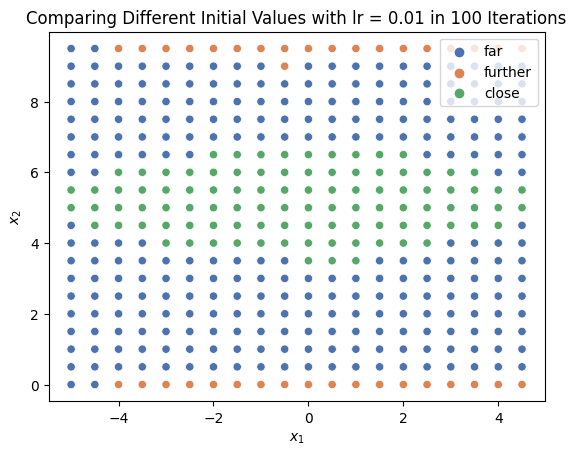

In [9]:
X1, X2 = np.meshgrid(_X1, _X2)
sns.scatterplot(x = np.ravel(X1),y = np.ravel(X2), hue = np.ravel(distances_), palette="deep")
plt.title("Comparing Different Initial Values with lr = 0.01 in 100 Iterations")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

# Simulated Anealing

In [11]:
a=15
# Make data.
X = np.arange(-a, a, 0.1)
Y = np.arange(-a, a, 0.1)
X, Y = np.meshgrid(X, Y)
vectorized_f = f(X,Y).ravel()
sigma = np.std(vectorized_f)

In [12]:
def probability(y_old,y_new, T):
    return np.exp(-(y_new-y_old)/T)

In [13]:
X0 = np.random.rand(2,)*30-15
T = (max(vectorized_f) - min(vectorized_f))/2
X = X0
history = [[X,f(X)]]
n_iteration = 500
for i in range(n_iteration):
    noise = np.random.normal(loc = 0, scale = 0.2, size = (2,))
    candid = X + noise
    if f(candid) < f(X):
        X = candid
    else:
        random_prob = np.random.random()
        if random_prob < probability(f(X),f(candid),T):
            X = candid
    T = T*0.95 if T>10**-5 else 10**-5
    history.append([X,f(X)])
print("X = ",candid)
print("f(X) = ",f(candid))

X =  [0.04564021 4.08444463]
f(X) =  -36.223883606811


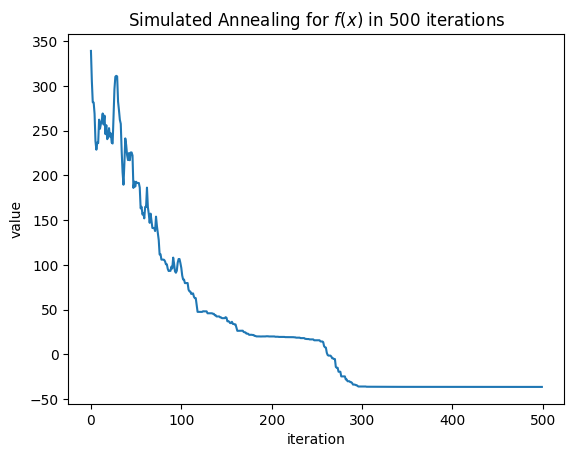

In [14]:
XY = [history[i][0] for i in range(n_iteration)]
XX = [XY[i][0] for i in range(n_iteration)]
YY = [XY[i][1] for i in range(n_iteration)]
values = [history[i][1] for i in range(n_iteration)]
plt.plot(values)
plt.title("Simulated Annealing for $f(x)$ in 500 iterations")
plt.xlabel("iteration")
plt.ylabel("value")
plt.show()

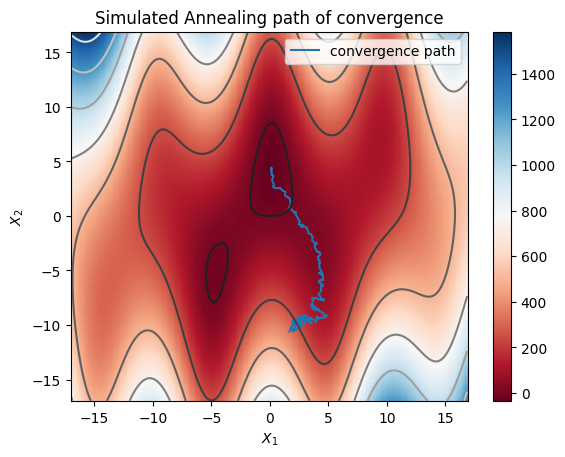

In [15]:
x = np.arange(-17, 17, 0.1)
y = np.arange(-17, 17, 0.1)
x_center = 0.5 * (x[:-1] + x[1:])
y_center = 0.5 * (y[:-1] + y[1:])

X, Y = np.meshgrid(x_center, y_center)
Z = f(X, Y)


plt.plot(XX,YY)
plt.legend(["convergence path"])
plot = plt.pcolormesh(x, y, Z, cmap='RdBu')
cset = plt.contour(X, Y, Z, cmap='gray')
plt.colorbar(plot)
plt.title("Simulated Annealing path of convergence")
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()